In [41]:
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.misc import electrocardiogram
from scipy.signal import savgol_filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
prefix = "../data/GS4_Trace"
dataType=["_rXV.txt","_rYT.txt","_xxerror.txt","_yTerror.txt"]
noArray=np.arange(1,90)

In [31]:
peaks,_=find_peaks(y)
results_half = peak_widths(y, peaks, rel_height=1)

In [32]:
results_half[0]

array([ 1.28746744,  2.87794923,  2.17795535,  1.92923398,  3.74981359,
        3.72088414,  2.29740415,  9.58039265,  3.96570852,  1.15288859,
        2.90783982, 34.04787466, 14.59083809,  1.42383332,  5.77158096,
        1.41715204,  2.34074895,  1.79795866,  4.93706565,  1.54423776,
        1.57736411,  4.88421151,  4.89271968])

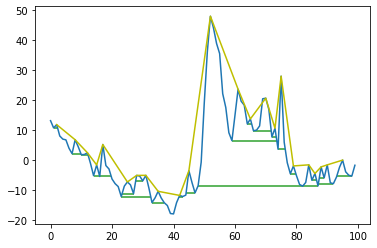

In [33]:
plt.plot(y)
plt.plot(peaks, y[peaks], "y")
plt.hlines(*results_half[1:], color="C2")

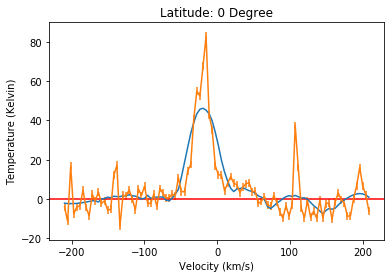

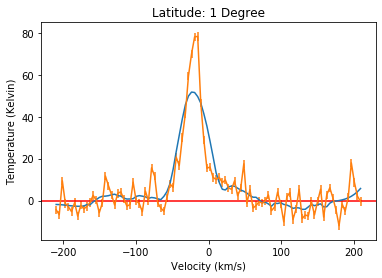

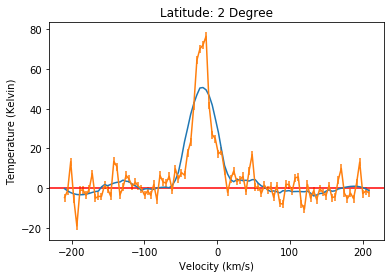

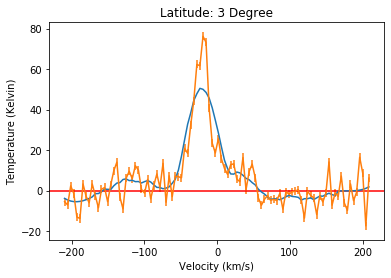

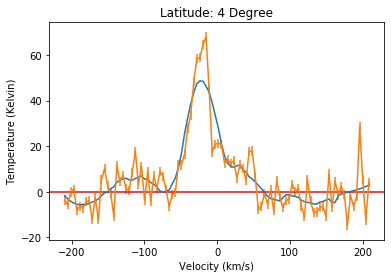

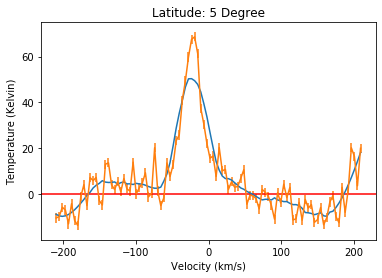

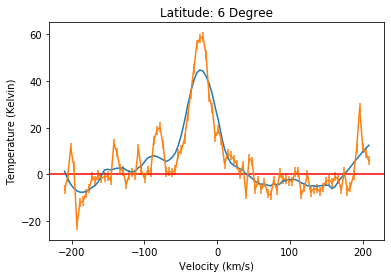

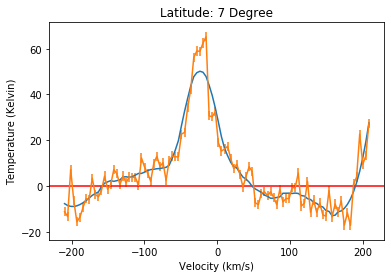

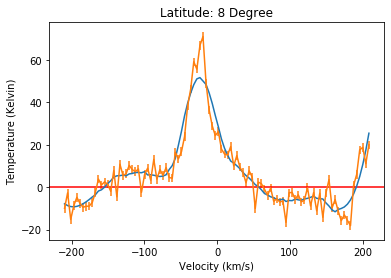

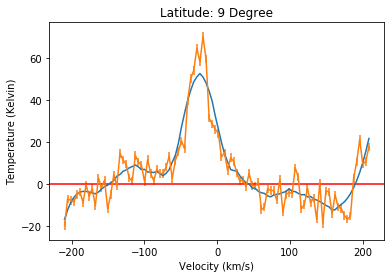

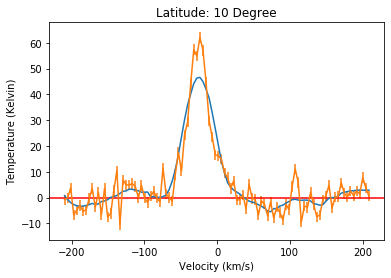

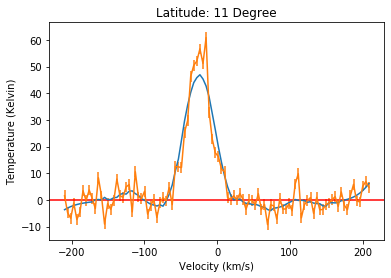

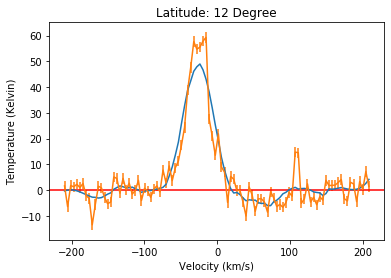

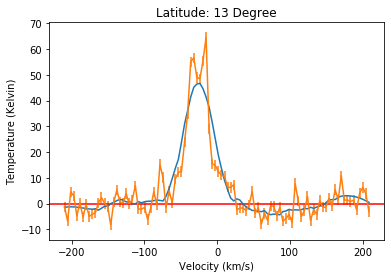

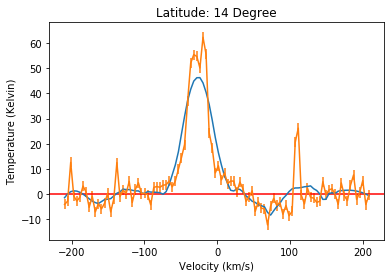

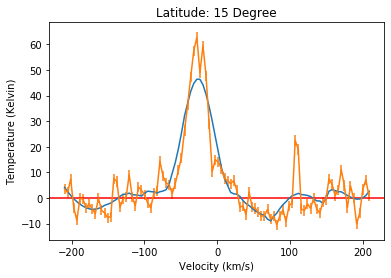

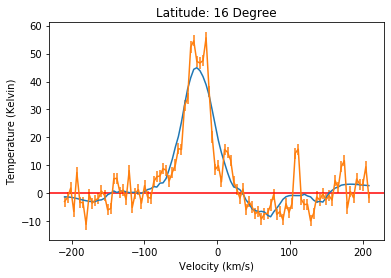

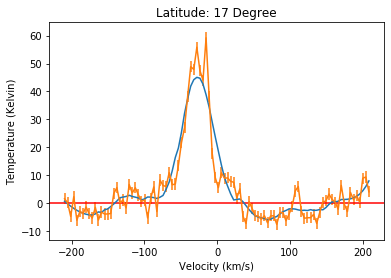

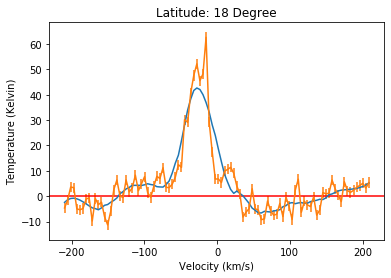

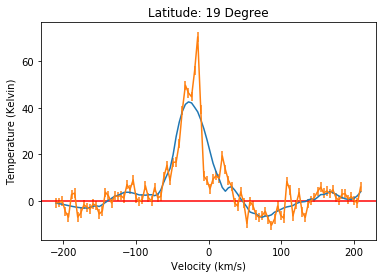

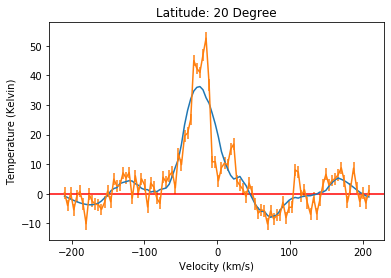

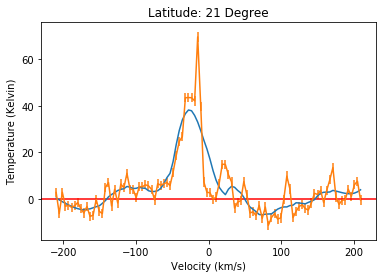

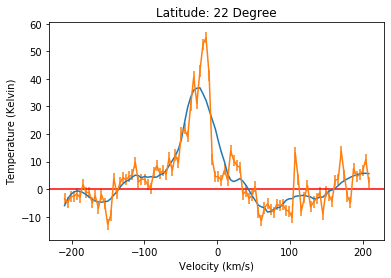

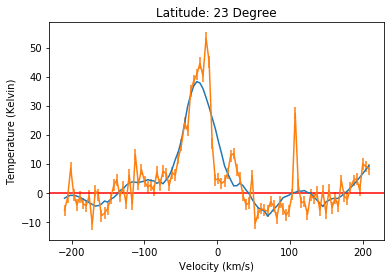

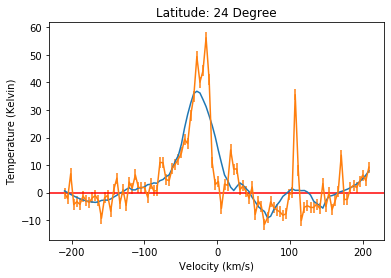

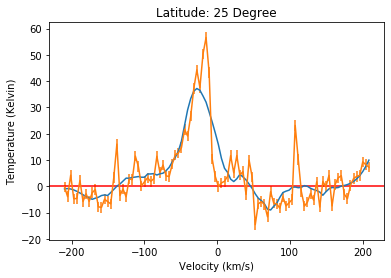

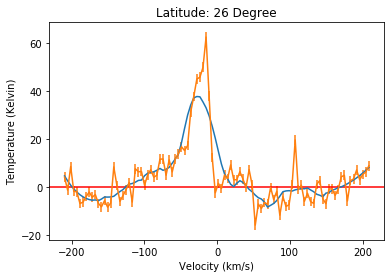

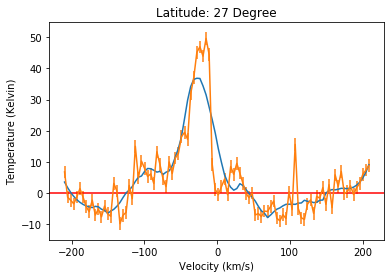

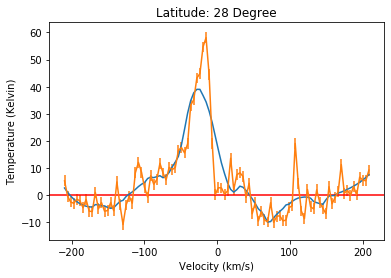

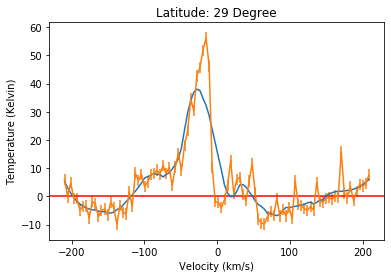

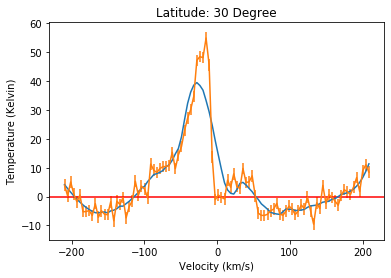

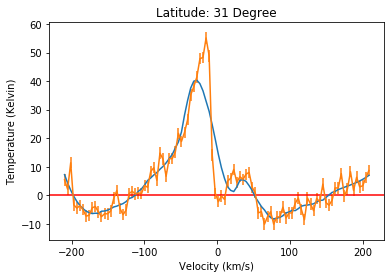

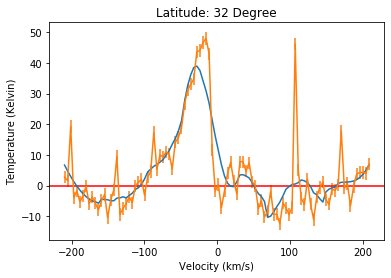

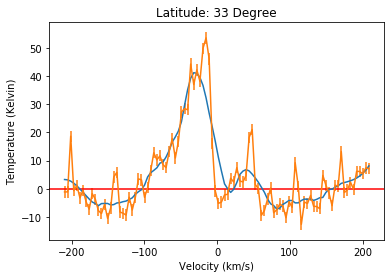

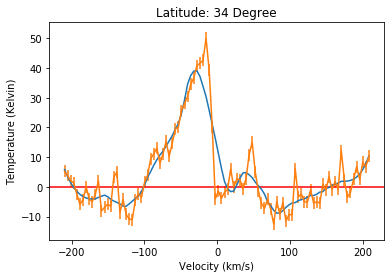

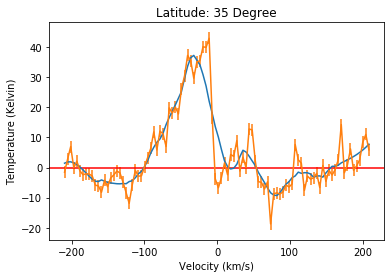

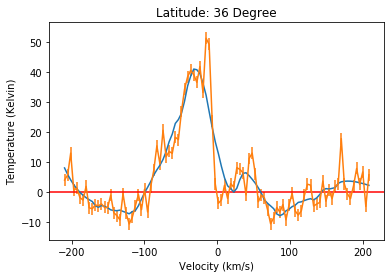

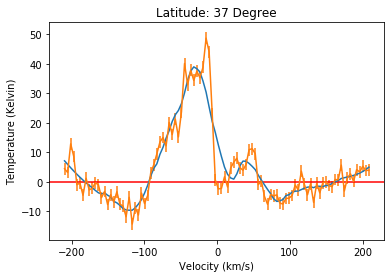

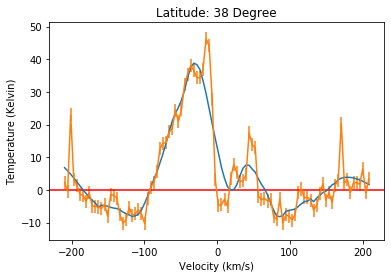

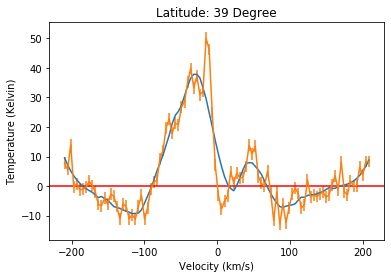

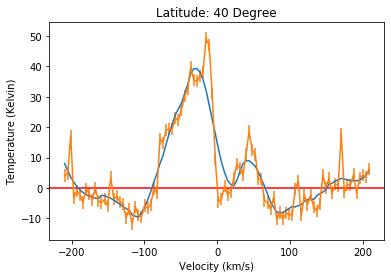

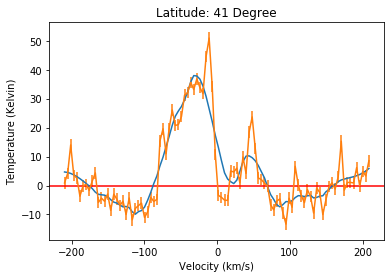

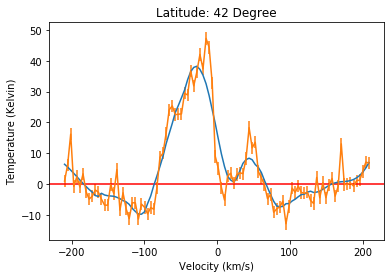

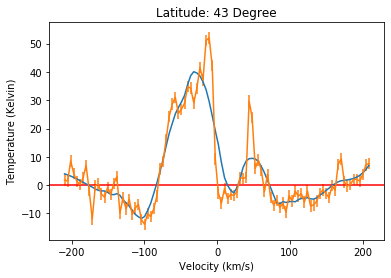

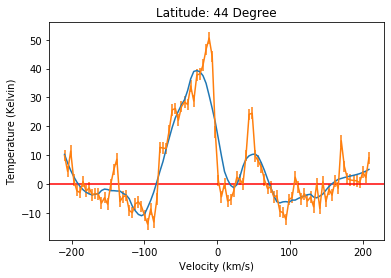

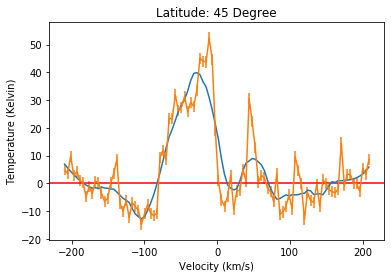

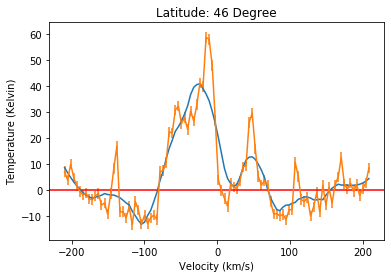

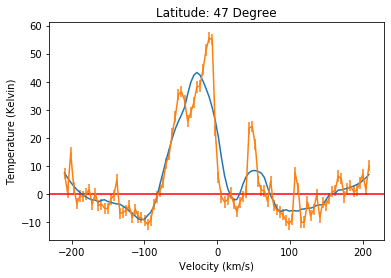

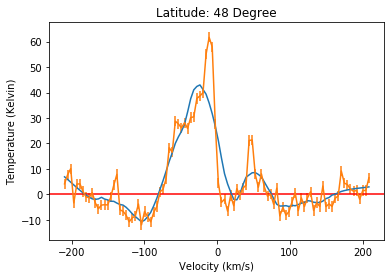

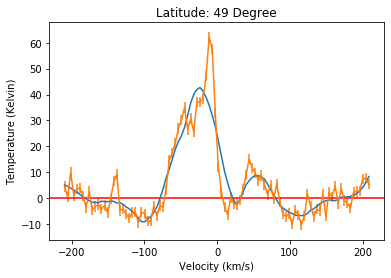

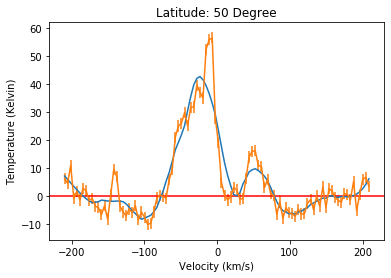

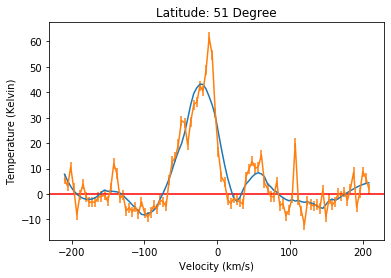

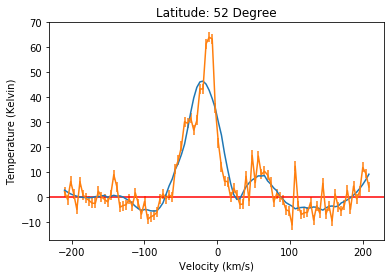

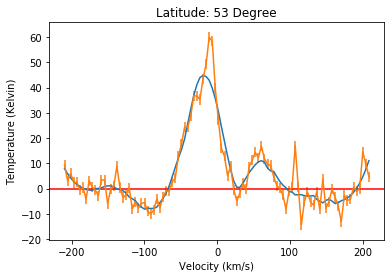

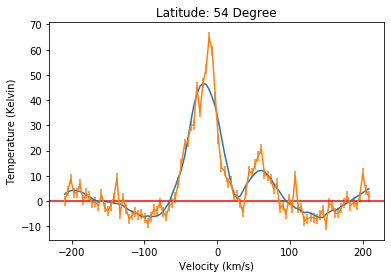

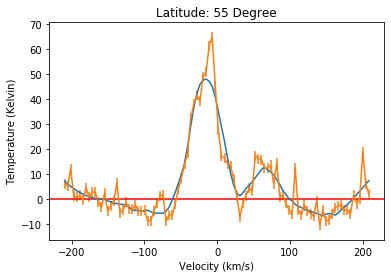

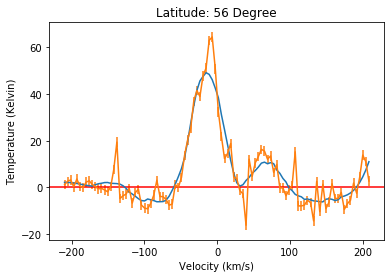

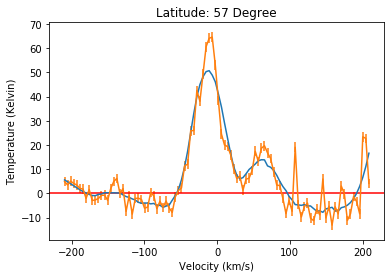

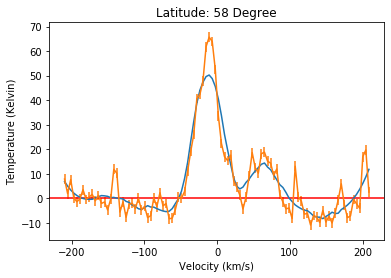

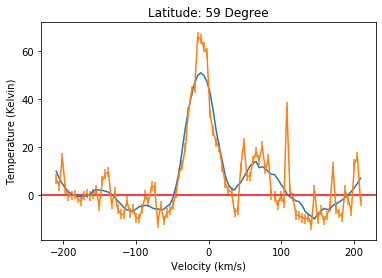

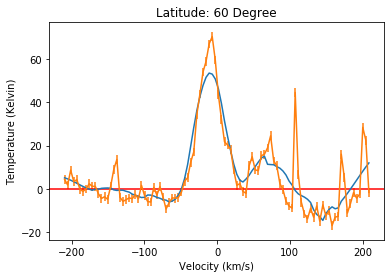

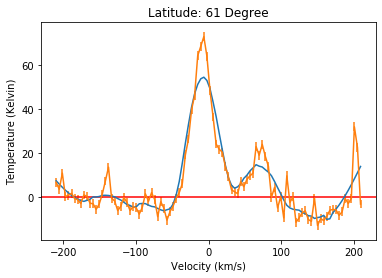

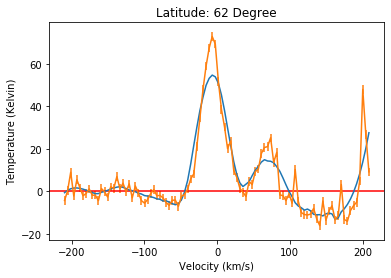

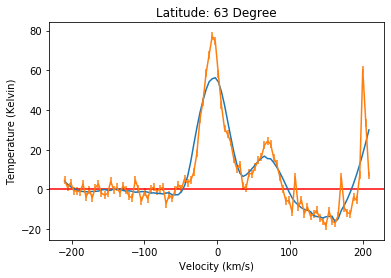

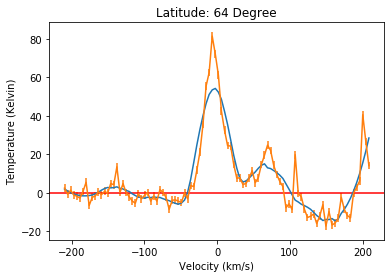

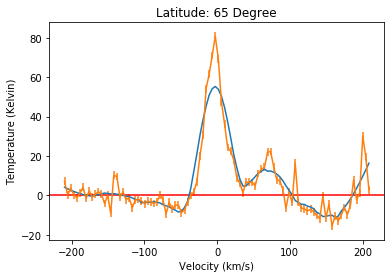

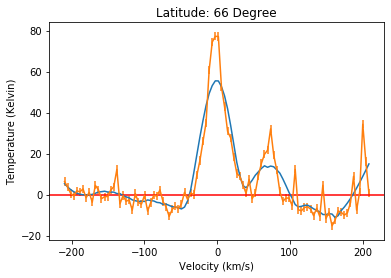

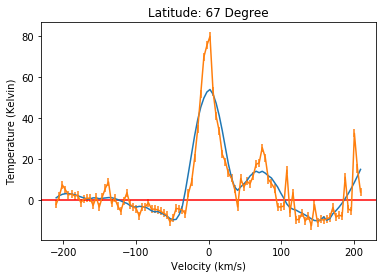

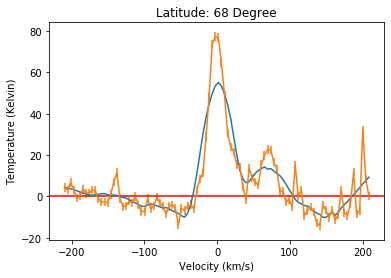

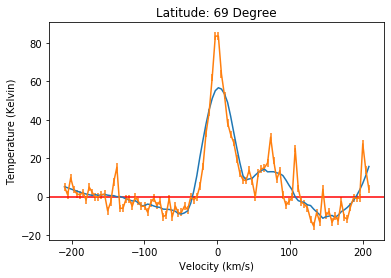

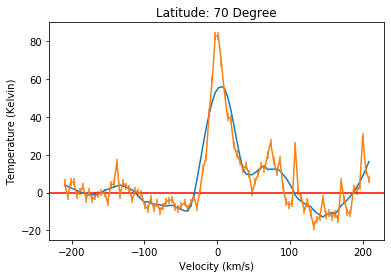

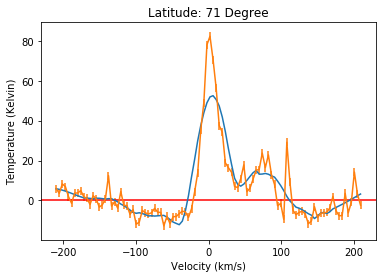

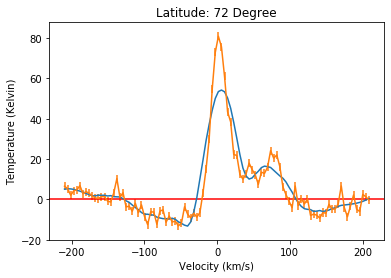

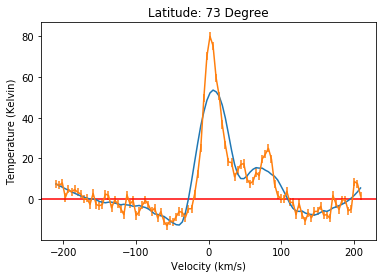

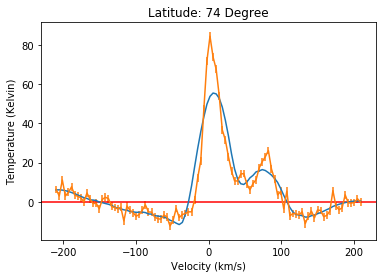

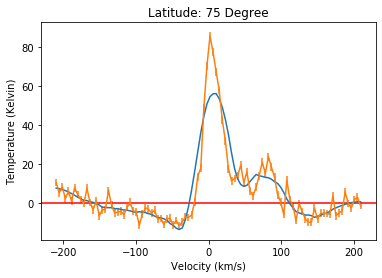

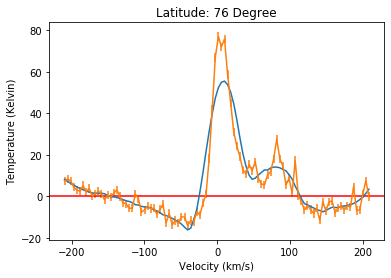

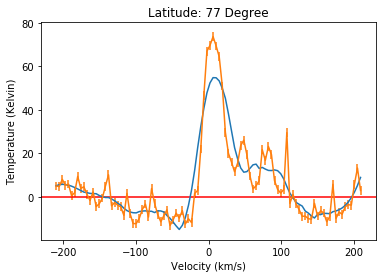

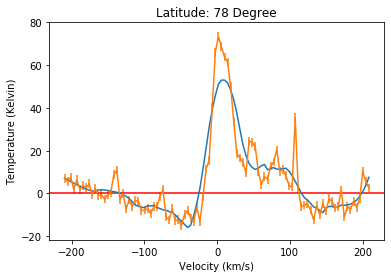

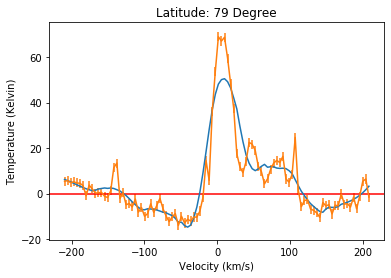

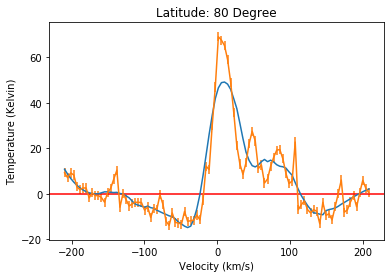

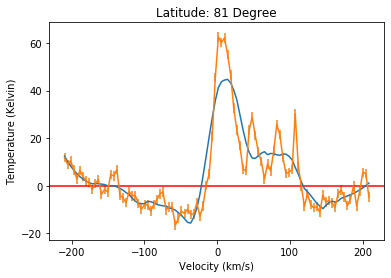

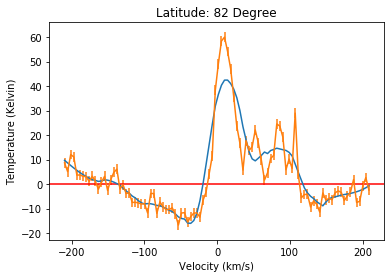

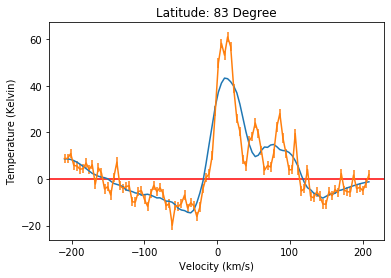

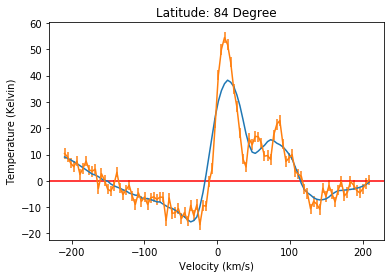

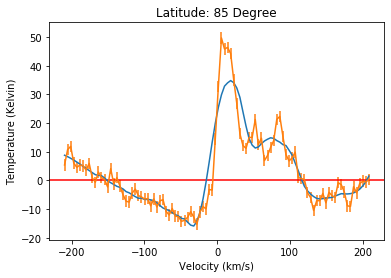

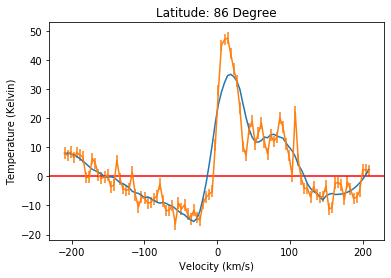

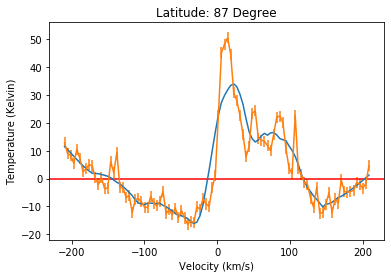

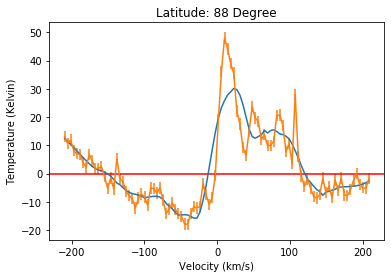

In [49]:
for i in noArray:
    x=np.loadtxt(prefix+str(i)+dataType[0])
    y=np.loadtxt(prefix+str(i)+dataType[1])
    std=np.std(y)
    mean=np.mean(y)
    xError=np.loadtxt(prefix+str(i)+dataType[2])
    yError=np.loadtxt(prefix+str(i)+dataType[3])
    yhat=savgol_filter(y,19,3)
    plt.xlabel("Velocity (km/s)")
    plt.ylabel("Temperature (Kelvin)")
    plt.axhline(y=0,color='r')
    plt.plot(x,yhat)
    
    plt.title("Latitude: {} Degree".format(i-1))
    plt.errorbar(x,y,xerr=xError,yerr=yError)
#     plt.plot(x,np.full(len(x),std-mean))
    plt.show()